In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-darkgrid')

from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter

myLoc = MultipleLocator(14)

myFmt = DateFormatter('%Y/%m')

In [2]:
df=pd.read_csv('http://taanila.fi/beer.csv')
df.index=pd.to_datetime(df['Month'])
df=df.drop('Month',axis=1)
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


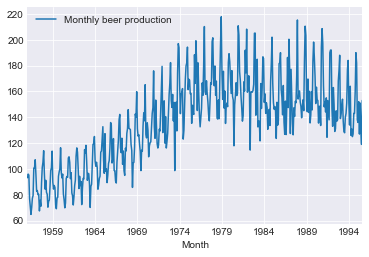

In [3]:
df.plot()

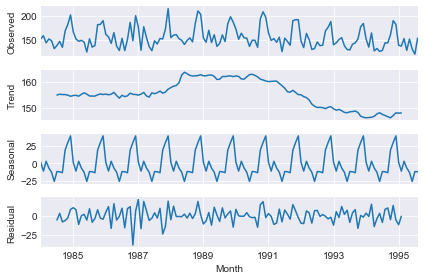

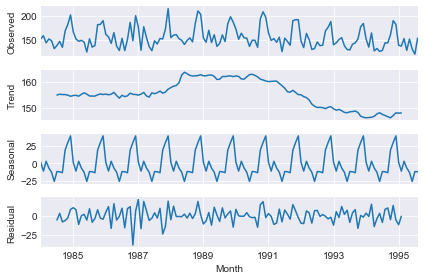

In [4]:
from statsmodels.tsa.api import seasonal_decompose

seasonal_decompose(df['Monthly beer production']['1984':]).plot()

In [5]:
from statsmodels.tsa.api import ExponentialSmoothing

malli = ExponentialSmoothing(df['Monthly beer production']).fit()

C:\Users\noora\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [6]:
df['Estimate'] = malli.fittedvalues
df.head(20)

,Monthly beer production,Estimate
Month,,
1956-01-01,93.2,93.203435
1956-02-01,96.0,93.201107
1956-03-01,95.2,95.097960
1956-04-01,77.1,95.167114
1956-05-01,70.9,82.922754
1956-06-01,64.8,74.774749
1956-07-01,70.1,68.014709
1956-08-01,77.3,69.427943
1956-09-01,79.5,74.762957


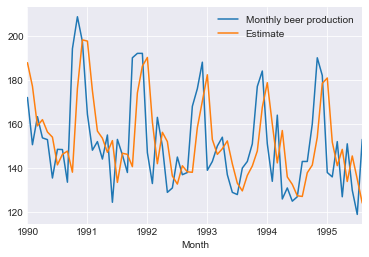

In [7]:
df['1990':].plot()

In [17]:
df['Estimate error'] = malli.resid
df.tail(20)

,Monthly beer production,Estimate,Estimate error
Month,,,
1994-01-01,151.0,178.707359,-27.707359
1994-02-01,134.0,159.929657,-25.929657
1994-03-01,164.0,142.356731,21.643269
1994-04-01,126.0,157.024706,-31.024706
1994-05-01,131.0,135.998787,-4.998787
1994-06-01,125.0,132.611033,-7.611033
1994-07-01,127.0,127.452919,-0.452919
1994-08-01,143.0,127.145969,15.854031
1994-09-01,143.0,137.890489,5.109511


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('mean squared error', mean_squared_error(df['Monthly beer production']
                                               , df['Estimate']))
print('mean absolute error', mean_absolute_error(df['Monthly beer production'],
                                                 df['Estimate']))

mean squared error 356.770219307242
mean absolute error 14.934240842075576


Text(0, 0.5, 'Estimate error')

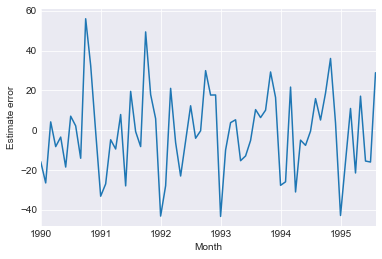

In [10]:
df['Estimate error']['1990':].plot()
plt.ylabel('Estimate error')

Text(0, 0.5, 'Monthly beer production')

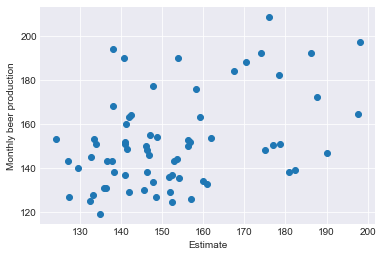

In [13]:
plt.scatter(x = df['Estimate']['1990':], y = df['Monthly beer production']['1990':])
plt.xlabel('Estimate')
plt.ylabel('Monthly beer production')

In [18]:
index = pd.date_range('1995-09-01', periods = 12, freq = 'MS')

ennusteet = malli.forecast(12)

df_ennuste = pd.DataFrame(data = ennusteet, index = index,
                         columns = ['Estimate'])

df_ennuste

,Estimate
1995-09-01,143.703615
1995-10-01,143.703615
1995-11-01,143.703615
1995-12-01,143.703615
1996-01-01,143.703615
1996-02-01,143.703615
1996-03-01,143.703615
1996-04-01,143.703615
1996-05-01,143.703615
1996-06-01,143.703615


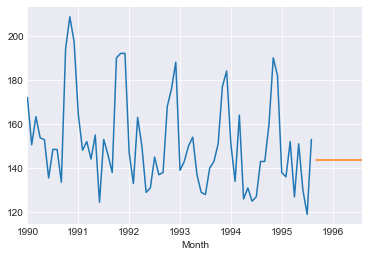

In [19]:
df['Monthly beer production']['1990':].plot()

df_ennuste['Estimate']['1990':].plot()

In [20]:
df = pd.concat([df, df_ennuste])
df

C:\Users\noora\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Estimate,Estimate error,Monthly beer production
1956-01-01,93.203435,-0.003435,93.2
1956-02-01,93.201107,2.798893,96.0
1956-03-01,95.097960,0.102040,95.2
1956-04-01,95.167114,-18.067114,77.1
1956-05-01,82.922754,-12.022754,70.9
1956-06-01,74.774749,-9.974749,64.8
1956-07-01,68.014709,2.085291,70.1
1956-08-01,69.427943,7.872057,77.3
1956-09-01,74.762957,4.737043,79.5
1956-10-01,77.973323,22.626677,100.6


In [21]:
malli.params

{'smoothing_level': 0.677715325172122,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 93.20343476228899,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}